# 一次元の波 (自由端条件)

In [1]:
import numpy as np
from matplotlib import pyplot, animation, rc
from IPython.display import HTML

In [2]:
s = 1.0     # 波の伝わる速さ
L = 1.0     # 系の長さ
T = 2.0     # シミュレーション時間
n = 100     # 空間刻み数
m = 200     # 時間刻み数
dx = L/n    # 空間刻み幅
dt = T/m    # 時間刻み幅
a = s*dt/dx # α

In [3]:
# 初期条件
x = np.linspace(0,L,n,False)
u0 = np.exp(-200*(x-0.5*L)**2) # 初期変位
v0 = np.zeros(n) # 初期速度

In [4]:
# シミュレーション
u = np.zeros((m,n))
u[0,:] = u0[:]
u[1,1:-1] = (1-a**2)*u[0,1:-1]+dt*v0[1:-1]+(a**2/2)*(u[0,0:-2]+u[0,2:n])
for k in range(2,m):
    u[k,1:-1] = 2*(1-a**2)*u[k-1,1:-1]-u[k-2,1:-1]+a**2*(u[k-1,0:-2]+u[k-1,2:n])
    u[k,0] = u[k,1]   # 自由端条件 (i=0)
    u[k,-1] = u[k,-2] # 自由端条件 (i=n-1)

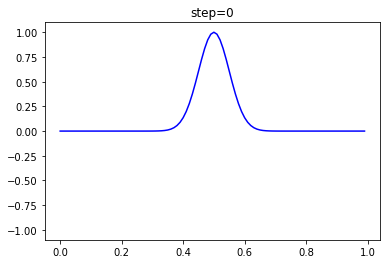

In [5]:
# 結果のプロット
def update(k):
    pyplot.cla()
    pyplot.plot(x,u[k],"b")
    pyplot.ylim(-1.1,1.1)
    pyplot.title('step='+str(k))
fig = pyplot.figure();
movie = animation.FuncAnimation(fig,update,frames=m,interval=50)
rc('animation',html='jshtml');
movie